In [1]:
library(MVN)

sROC 0.1-2 loaded


In [2]:
getwd()

[1] "/home/acevedo/Desktop/Gaussian_WGAN_GP/MicrobiotaGAN/notebooks"

In [3]:
# phylo <-> dirchlet
o_phylo_data <- as.matrix(read.csv('../data/dirichlet_100spec.csv',header =FALSE))
o_gan_data <- as.matrix(read.csv('../data/dirichlet_gan_samples.csv',header =FALSE))


In [4]:

phylo_data <- o_phylo_data[sample(nrow(o_phylo_data)),]
gan_data <- o_gan_data[sample(nrow(o_gan_data)),]

 

In [5]:
dim(gan_data)
dim(phylo_data)



[1] 10496   100

[1] 60000   100

In [11]:
rowSums(phylo_data)[1:5]

[1] 1 1 1 1 1

In [12]:
rowSums(gan_data)[1:5]

[1] 1 1 1 1 1

In [8]:
gan_mean <- colMeans(gan_data) 
gan_sd <- apply(gan_data, 2 ,sd) # two means that we apply the function over the columns
# length(temp)
print("GAN Mean Vector")
print(gan_mean[1:5])
print("GAN STD Vector")
print(gan_sd[1:5])


[1] "GAN Mean Vector"
        V1         V2         V3         V4         V5 
0.01006562 0.01060201 0.00939326 0.01066261 0.00839568 
[1] "GAN STD Vector"
         V1          V2          V3          V4          V5 
0.010146300 0.010271592 0.008829676 0.010189560 0.008284722 


In [9]:
phylo_mean <- colMeans(phylo_data) 
phylo_sd <- apply(phylo_data, 2 ,sd) # two means that we apply the function over the columns

print("Train Mean Vector")
print(phylo_mean[1:5])
print("Train STD Vector")
print(phylo_sd[1:5])

[1] "Train Mean Vector"
         V1          V2          V3          V4          V5 
0.009987500 0.010036514 0.010054610 0.009973145 0.009983339 
[1] "Train STD Vector"
         V1          V2          V3          V4          V5 
0.009867214 0.009926754 0.009962642 0.009888796 0.009901446 


In [13]:
alt <- data.frame(phylo_data)[1:5000,1:100]

Warning message in covMcd(data, alpha = alpha):
“The covariance matrix of the data is singular.
There are 5000 observations (in the entire dataset of 5000 obs.) lying
on the hyperplane with equation a_1*(x_i1 - m_1) + ... + a_p*(x_ip -
m_p) = 0 with (m_1, ..., m_p) the mean of these observations and
coefficients a_i from the vector a <- c(0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1)”

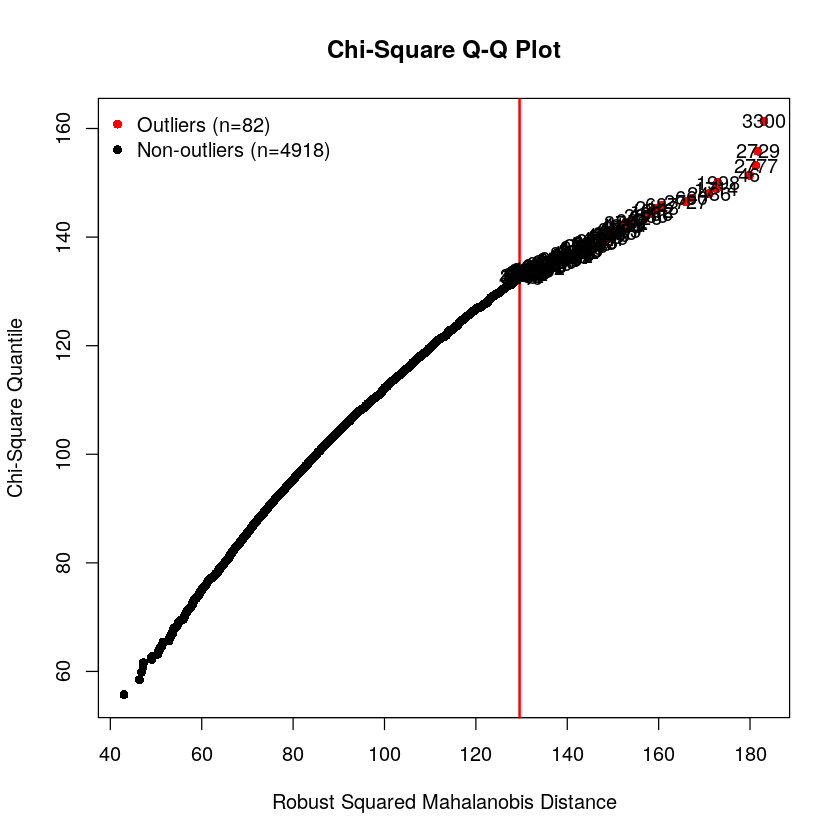

In [14]:
result <- mvn(data = alt, mvnTest = "hz", multivariateOutlierMethod = "quan", showOutliers = TRUE, showNewData = TRUE)
outlier_free <- result$newData

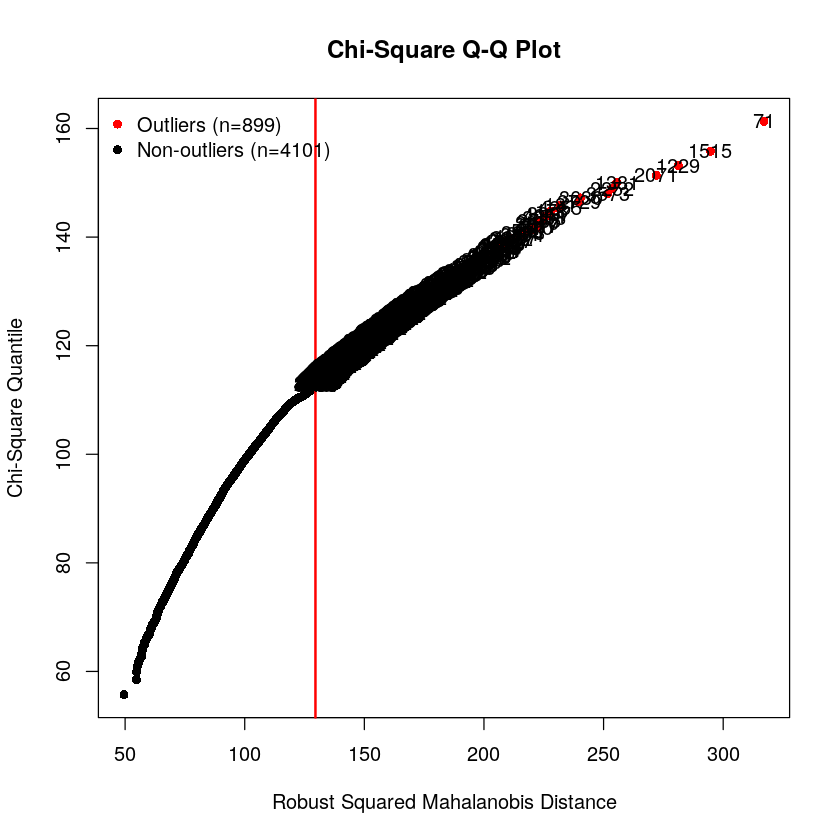

In [16]:
test_gan <- data.frame(gan_data)[1:5000,1:100]
result2 <- mvn(data = test_gan, mvnTest = "hz", multivariateOutlierMethod = "quan", showOutliers = TRUE, showNewData = TRUE)
gan_outlier_free <- result2$newData

In [17]:
indice <- dim(gan_outlier_free)[1]

In [22]:
a1 <- as.matrix(outlier_free[1:105,1:100])
a2 <- as.matrix(gan_outlier_free[1:105,1:100])

wilcox.test(a1,a2)


	Wilcoxon rank sum test with continuity correction

data:  a1 and a2
W = 53278000, p-value = 2.624e-05
alternative hypothesis: true location shift is not equal to 0
